In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("aapl.csv",parse_dates=["Date"],  index_col="Date")
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-26,176.350006,180.619995,172.449997,176.210007,176.210007,202128400
2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


In [2]:
df.index

DatetimeIndex(['2014-09-29', '2014-10-06', '2014-10-13', '2014-10-20',
               '2014-10-27', '2014-11-03', '2014-11-10', '2014-11-17',
               '2014-11-24', '2014-12-01',
               ...
               '2018-01-22', '2018-01-29', '2018-02-05', '2018-02-12',
               '2018-02-19', '2018-02-26', '2018-03-05', '2018-03-12',
               '2018-03-19', '2018-03-26'],
              dtype='datetime64[ns]', name='Date', length=183, freq=None)

In [3]:
df.Close.mean()

127.1317485409836

<AxesSubplot:xlabel='Date'>

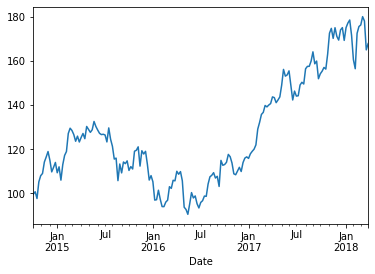

In [4]:
%matplotlib inline
df.Close.resample('W').mean().plot()

<AxesSubplot:xlabel='Date'>

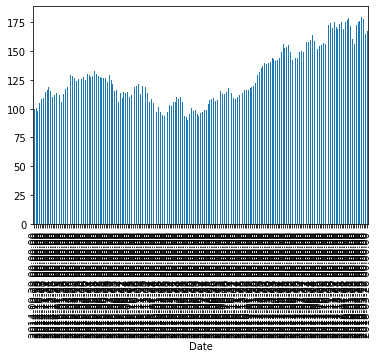

In [5]:
%matplotlib inline
df.Close.plot(kind="bar")

<AxesSubplot:xlabel='Date'>

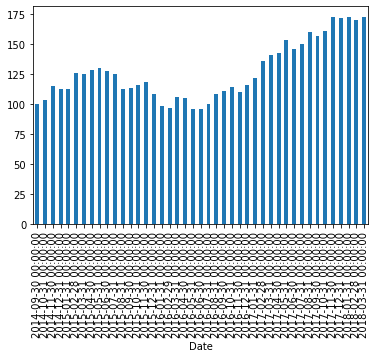

In [6]:
%matplotlib inline
df.Close.resample('M').mean().plot(kind="bar")

In [7]:
df = pd.read_csv("no_dates.csv")
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
0,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [8]:
rng = pd.date_range(start="2014-09-29",end="2018-03-29",freq="W-MON")
rng

DatetimeIndex(['2014-09-29', '2014-10-06', '2014-10-13', '2014-10-20',
               '2014-10-27', '2014-11-03', '2014-11-10', '2014-11-17',
               '2014-11-24', '2014-12-01',
               ...
               '2018-01-22', '2018-01-29', '2018-02-05', '2018-02-12',
               '2018-02-19', '2018-02-26', '2018-03-05', '2018-03-12',
               '2018-03-19', '2018-03-26'],
              dtype='datetime64[ns]', length=183, freq='W-MON')

<AxesSubplot:>

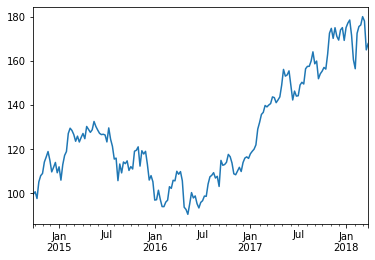

In [9]:
%matplotlib inline
df.set_index(rng,inplace=True)
df.Close.plot()

In [10]:
df["2017-01"]

,Open,High,Low,Close,Adj Close,Volume
2017-01-02,115.800003,118.160004,114.760002,117.910004,115.572708,103845500
2017-01-09,117.949997,119.930000,117.940002,119.040001,116.680298,138810700
2017-01-16,118.339996,120.500000,118.220001,120.000000,117.621269,116348000
2017-01-23,120.000000,122.440002,119.500000,121.949997,119.532608,124539300
2017-01-30,120.930000,130.490005,120.620003,129.080002,126.521278,249781200


In [11]:
df.asfreq('BAS',method="pad")
# to fill sat-sun price with friday price

,Open,High,Low,Close,Adj Close,Volume
2015-01-01,113.790001,114.769997,107.349998,109.330002,103.074181,152088400
2016-01-01,107.589996,109.430000,104.820000,105.260002,100.927895,123484500
2017-01-02,115.800003,118.160004,114.760002,117.910004,115.572708,103845500
2018-01-01,170.160004,175.369995,169.259995,175.000000,174.289398,101168400


In [12]:
rng = pd.date_range(start="2014-09-29",periods=183,freq="W-MON")
rng

DatetimeIndex(['2014-09-29', '2014-10-06', '2014-10-13', '2014-10-20',
               '2014-10-27', '2014-11-03', '2014-11-10', '2014-11-17',
               '2014-11-24', '2014-12-01',
               ...
               '2018-01-22', '2018-01-29', '2018-02-05', '2018-02-12',
               '2018-02-19', '2018-02-26', '2018-03-05', '2018-03-12',
               '2018-03-19', '2018-03-26'],
              dtype='datetime64[ns]', length=183, freq='W-MON')

In [13]:
import numpy as np
ts = pd.Series(np.random.randint(1,10,len(rng)),index=rng)
ts.head(10)

2014-09-29    4
2014-10-06    9
2014-10-13    9
2014-10-20    6
2014-10-27    5
2014-11-03    7
2014-11-10    4
2014-11-17    9
2014-11-24    3
2014-12-01    2
Freq: W-MON, dtype: int32

In [14]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

In [17]:
usb = CustomBusinessDay(calendar=USFederalHolidayCalendar())
rng = pd.date_range(start="2014-09-29",end="2018-03-29",freq="B")
rng

DatetimeIndex(['2014-09-29', '2014-09-30', '2014-10-01', '2014-10-02',
               '2014-10-03', '2014-10-06', '2014-10-07', '2014-10-08',
               '2014-10-09', '2014-10-10',
               ...
               '2018-03-16', '2018-03-19', '2018-03-20', '2018-03-21',
               '2018-03-22', '2018-03-23', '2018-03-26', '2018-03-27',
               '2018-03-28', '2018-03-29'],
              dtype='datetime64[ns]', length=914, freq='B')